In [7]:
# import library
from PIL import Image
import math
import matplotlib.pyplot as plt

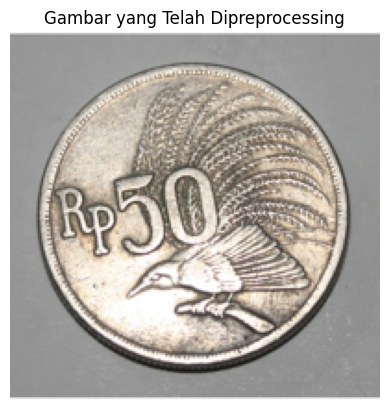

In [5]:
# Preprocessing Gambar

img = Image.open('uang_logam2.jpeg')

img_final = img.convert("RGB").resize((200, 200))

# Menampilkan gambar
plt.imshow(img_final)
plt.title('Gambar yang Telah Dipreprocessing')
plt.axis("off")
plt.show()

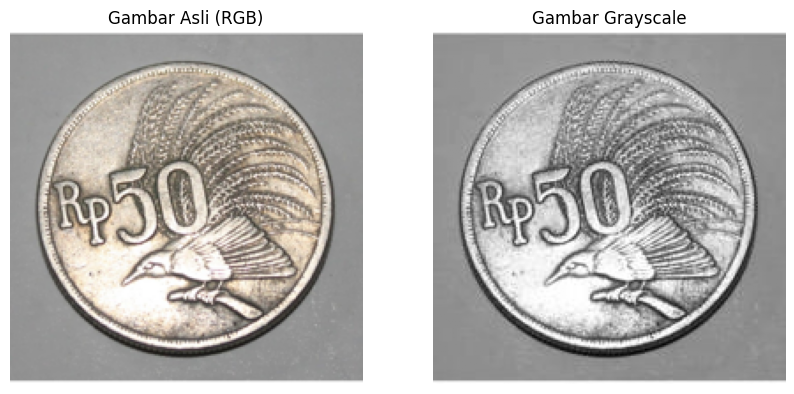

In [6]:
# Convert to GrayScale

widht, height = img_final.size

img_gray = Image.new("L", (widht, height))

for y in range(height):
  for x in range(widht):
    r, g, b = img_final.getpixel((x, y))

    gray_value = int(0.299 * r + 0.587 * g + 0.114 * b)

    img_gray.putpixel((x, y), gray_value)

img_gray.save('img_gray.jpg')


# Tampilkan gambar asli dan grayscale
plt.figure(figsize=(10, 5))

# Gambar asli RGB
plt.subplot(1, 2, 1)
plt.imshow(img_final)
plt.title("Gambar Asli (RGB)")
plt.axis("off")

# Gambar hasil Grayscale
plt.subplot(1, 2, 2)
gray_open = Image.open('img_gray.jpg')
plt.imshow(gray_open, cmap="gray")
plt.title("Gambar Grayscale")
plt.axis("off")

plt.show()

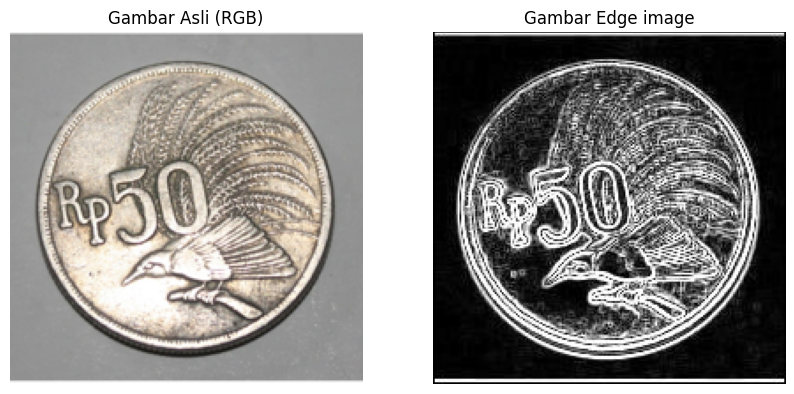

In [14]:
def prewit_edge_detection(input_image_path, output_image_path):
    # Buka citra dan konversi ke grayscale
    img = Image.open(input_image_path)
    width, height = img.size

    # Inisialisasi citra output
    output_img = Image.new('L', (width, height))  # Citra grayscale


    # Kernel Sobel untuk gradien horizontal (Gx) dan vertikal (Gy)
    sobel_x = [[-1, 0, 1],
               [-1, 0, 1],
               [-1, 0, 1]]

    sobel_y = [[-1, -1, -1],
               [ 0,  0,  0],
               [ 1,  1,  1]]

    # Loop melalui setiap piksel (kecuali piksel di tepi citra)
    for y in range(1, height - 1):
        for x in range(1, width - 1):
            # Inisialisasi gradien
            gx = 0
            gy = 0

            # Loop melalui kernel Sobel
            for ky in range(-1, 2):
                for kx in range(-1, 2):
                    # Ambil nilai piksel di sekitar (x, y)
                    pixel_value = img.getpixel((x + kx, y + ky))

                    # Hitung gradien horizontal (Gx) dan vertikal (Gy)
                    gx += pixel_value * sobel_x[ky + 1][kx + 1]
                    gy += pixel_value * sobel_y[ky + 1][kx + 1]

            # Hitung magnitude gradien
            magnitude = math.sqrt(gx**2 + gy**2)

            # Batasi nilai magnitude ke rentang 0-255
            magnitude = 0 if magnitude < 0 else 255 if magnitude > 255 else int(magnitude)

            # Set nilai piksel pada citra output
            output_img.putpixel((x,y), magnitude)

    # Simpan citra hasil deteksi tepi
    output_img.save(output_image_path)

# Contoh penggunaan
prewit_edge_detection('img_gray.jpg', 'output_edge_image.jpg')

# Tampilkan gambar asli dan grayscale
plt.figure(figsize=(10, 5))

# Gambar asli RGB
plt.subplot(1, 2, 1)
plt.imshow(img_final)
plt.title("Gambar Asli (RGB)")
plt.axis("off")

# Gambar hasil Grayscale
plt.subplot(1, 2, 2)
edge_open = Image.open('output_edge_image.jpg')
plt.imshow(edge_open, cmap="gray")
plt.title("Gambar Edge image")
plt.axis("off")

plt.show()

In [23]:
# Import Library
import cv2

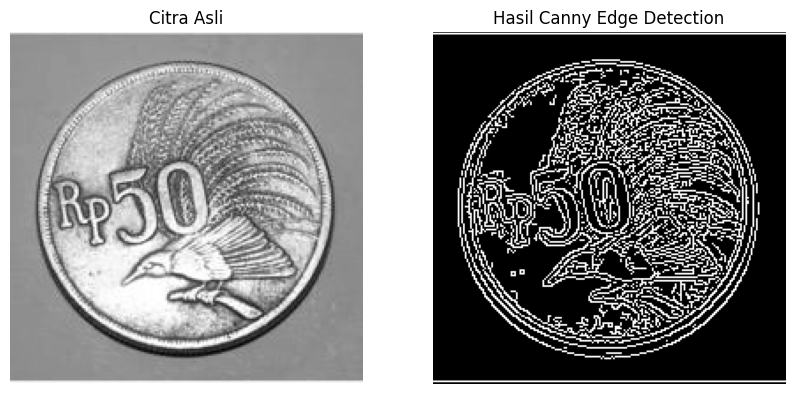

In [24]:
# Fungsi Canny Detection
def canny_edge_detection(input_image_path, output_image_path, low_threshold=100, high_threshold=200):
    # Baca citra dalam mode grayscale
    img = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

    # Terapkan Canny Edge Detection
    edges = cv2.Canny(img, low_threshold, high_threshold)

    # Simpan hasil deteksi tepi
    cv2.imwrite(output_image_path, edges)

    # Tampilkan citra asli dan hasil deteksi tepi
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Citra Asli')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title('Hasil Canny Edge Detection')
    plt.axis('off')

    plt.show()

# Contoh penggunaan
canny_edge_detection('img_gray.jpg', 'output_canny_edge.jpg')